In [42]:
# !pip install scikit-learn
# !pip install seaborn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [27]:
red = pd.read_csv('Red.csv')
rose = pd.read_csv('Rose.csv')
sparkling = pd.read_csv('Sparkling.csv')
white = pd.read_csv('White.csv')
alls = [red, rose, sparkling, white]
columns = ["red", "rose", "sparkling", "white"]

In [28]:
def add_column():
    red["Class"]="Red"
    rose["Class"]="Rose"
    sparkling["Class"] = "Sparkling"
    white["Class"] = "White"
add_column()

In [29]:
def concat_data()  :  
    all_data = pd.concat([red, rose, sparkling, white], ignore_index=True)
    return all_data.sort_index()
all_data=concat_data()

In [30]:
def summer_data(data):   
    print(f"Shape \n{data.shape}\n")
    print(f"Info \n{data.info()}\n")
    print(f"Describe of data \n{data.describe()}\n")
    print(f"Head of 10 rows \n{data.head()}")
summer_data(concat_data())

Shape 
(13834, 9)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13834 entries, 0 to 13833
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             13834 non-null  object 
 1   Country          13834 non-null  object 
 2   Region           13834 non-null  object 
 3   Winery           13834 non-null  object 
 4   Rating           13834 non-null  float64
 5   NumberOfRatings  13834 non-null  int64  
 6   Price            13834 non-null  float64
 7   Year             13834 non-null  object 
 8   Class            13834 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 972.8+ KB
Info 
None

Describe of data 
             Rating  NumberOfRatings         Price
count  13834.000000     13834.000000  13834.000000
mean       3.865664       428.322466     33.024850
std        0.296427      1838.413812     70.899893
min        2.200000        25.000000      3.150000
25%        3.70000

In [31]:
def cleaning_data(all_data):    
    count = all_data[all_data["Name"].str.contains("N.V.")]["Year"].value_counts()
    all_data["Year"] = all_data["Year"].str.replace("N.V.", "2030", regex=True)
    all_data["Year"].unique()

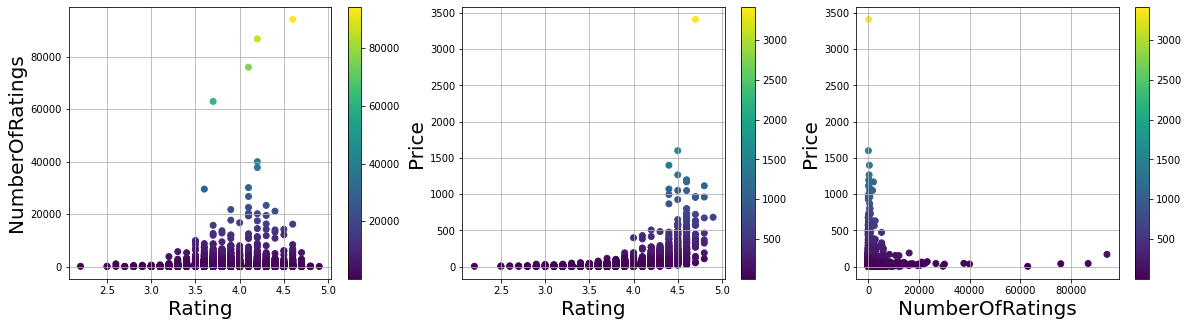

In [32]:
from itertools import combinations
def scatter_plots(all_data):
    col = ["Rating", "NumberOfRatings", "Price"]
    name = combinations(col,2)
    plt.figure(figsize=(20, 5))
    for i, j in zip(name, np.arange(len(col))):
        plt.subplot(1, 3, j+1)
        plt.scatter(all_data[i[0]], all_data[i[1]],c=all_data[i[1]], cmap="viridis")
        plt.xlabel(i[0], fontsize=20)
        plt.ylabel(i[1], fontsize=20)
        plt.colorbar()
        plt.grid()
    plt.show()
scatter_plots(all_data)

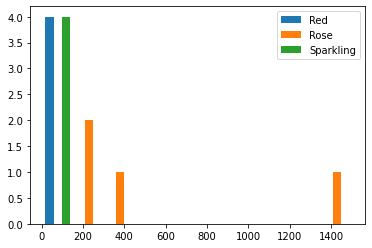

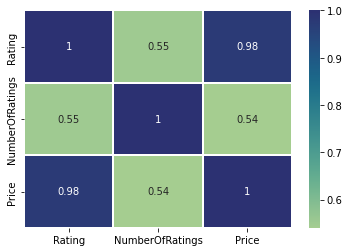

In [33]:
def classes(all_data):    
    class1 = all_data.groupby(all_data["Class"]).mean()
    label = class1.index.values
    plt.hist(class1, label=label)
    plt.legend()
    plt.show()
    sns.heatmap(class1.corr(), annot=True,linewidth=1, cmap="crest")
    plt.show()
classes(all_data)

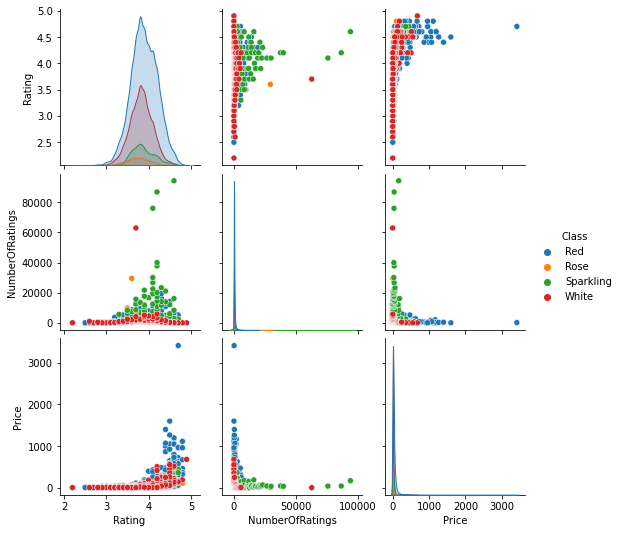

In [34]:
def pairplot_data(all_data):
    sns.pairplot(data=all_data, hue="Class")
pairplot_data(all_data)

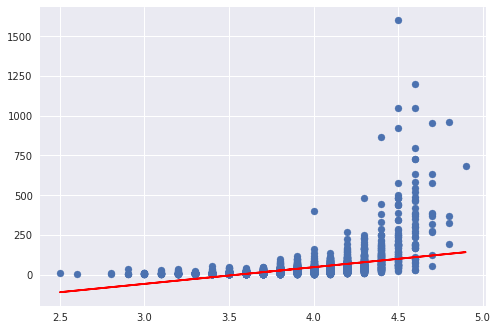

R^ score :0.22545496168345924
MSE :3863.758966696705


In [53]:
def machine_learning(all_data):
    Linear = LinearRegression()
    x , y = all_data["Rating"].values.reshape(-1, 1), all_data["Price"].values
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=100)
    Linear.fit(X_train, y_train)
    y_pred = Linear.predict(X_test)
    plt.style.use("seaborn")
    plt.scatter(X_test, y_test)
    plt.plot(X_test, y_pred, color='r')
    plt.show()
    print(f"R^ score :{r2_score(y_test, y_pred)}\nMSE :{mean_squared_error(y_test, y_pred)}")
machine_learning(all_data)